## Titanic project

Table of content
* 1. Preperation
    * 1.1. Import relevant librarie
    * 1.2. Load data from the file
* 2. Data overview
    * 2.1. Data dictionary
    * 2.2. Properties
    * 2.3. Features
    * 2.4. Null values
    * 2.5. Statistical distribution
    * 2.6. Data visualisation
* 3. Data cleaning
* 4. Choosing the best model

## 1. Preperation
### 1.1. Import relevent libraries

In [4]:
# data analysis
import pandas as pd
import numpy as np
from scipy import stats

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Modules imported")

Modules imported


### 1.2. Load data from the file

In [5]:
# load train.csv to pandas data frame, using 'PassengerId' as the index
train_df = pd.read_csv('train.csv', )
test_df = pd.read_csv('test.csv')

# Preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data overview
### 2.1. Data dictionary

![Dictionary](dictionary.png)
### 2.2. Properties

In [6]:
print("There are {} rows and {} columns"
      .format(train_df.shape[0], train_df.shape[1]))

There are 891 rows and 12 columns


In [7]:
# print basic summary of the dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 2.3. Features
The dataset contains 3 data types. We will assume that float64 represent continuos data, int64 represents descrete data and object represents categorical data.
* Continuos data: age, fare.
* Descrete data: survived, pclass, sibsp, parch.
* Categorical data: name, sex, cabin, embarked

## 2.4. Null values

In [5]:
master_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* As we can see cabin is null 687 out of 891 instances. Any imputation would likely introduce signficant bias. We can drop this feature.
* Null values constitute minor portion of the data age(177 of 891) and embarked(2 of 891). Imputation of these features will have minimal impact of correliation.

### 2.5. Statistical distribution

Print statistical distribution of all data

In [13]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lesurer, Mr. Gustave J",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Some observations:
* There are 577 male out of 891 which is 64.7%.
* There is only Fare max price of 512 which is much higher than mean value. We can consider to drop outlier values of fare column.

### 2.6. Data visualisation

Visualising each feature distribution 

**Survival by sex**

Precentage of female survived: 74.20382165605095 %
Precentage of male survived: 18.890814558058924 %


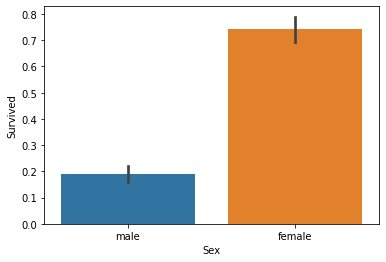

In [66]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train_df)

print("Precentage of female survived: {} %"
      .format(train_df['Survived'][train_df['Sex'] == 'female']
              .value_counts(normalize=True)[1]*100))

print("Precentage of male survived: {} %"
      .format(train_df['Survived'][train_df['Sex'] == 'male']
              .value_counts(normalize=True)[1]*100))

Significantly more female survived.

**Survival by Pclass**:

Precentage of 1 class survived: 0.6296296296296297 %
Precentage of 2 class survived: 0.47282608695652173 %
Precentage of 3 class survived: 0.24236252545824846 %
3    491
1    216
2    184
Name: Pclass, dtype: int64


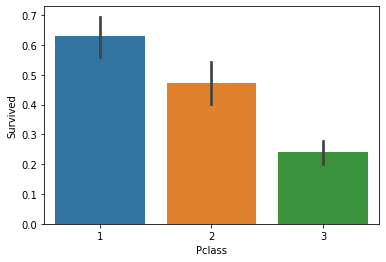

In [79]:
#draw bar plot of survival by sex
sns.barplot(x="Pclass", y="Survived", data=train_df)

print("Precentage of 1 class survived: {} %"
      .format(train_df['Survived'][train_df['Pclass'] == 1]
              .value_counts(normalize=True)[1]))

print("Precentage of 2 class survived: {} %"
      .format(train_df['Survived'][train_df['Pclass'] == 2]
              .value_counts(normalize=True)[1]))

print("Precentage of 3 class survived: {} %"
      .format(train_df['Survived'][train_df['Pclass'] == 3]
              .value_counts(normalize=True)[1]))

print(train_df['Pclass'].value_counts())

* We can see that the most people survived in 1 class by percentage scale
* Least people survived in 3 class by percentage scale.
* Most people comprised of 3 class.

**Survival by SibSp feature**

Precentage of 0 SibSp survived: 34.53947368421053 %
Precentage of 1 SibSp survived: 53.588516746411486 %
Precentage of 2 SibSp survived: 46.42857142857143 %
Precentage of 3 SibSp survived: 25.0 %
Precentage of 4 SibSp survived: 16.666666666666664 %
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


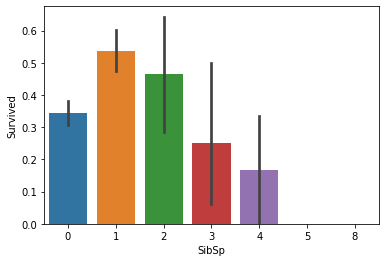

In [80]:
sns.barplot(x="SibSp", y="Survived", data=train_df)

print("Precentage of 0 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 0]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 1 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 1]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 2 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 2]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 3 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 3]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 4 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 4]
              .value_counts(normalize=True)[1]*100))

print(train_df['SibSp'].value_counts())

* The majority of people constitute in 0 and 1 SibSp
* 34% of people in 0 SibSp survived
* 53% of people in 1 SibSp survived 
* None of people in 5 and 8 SibSp survived
* It is clear that people with more siblings were less likely to survive

**Survival by parch**

The percentage of survived people who had 0 parents/children aboard: 0.34365781710914456 %
0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


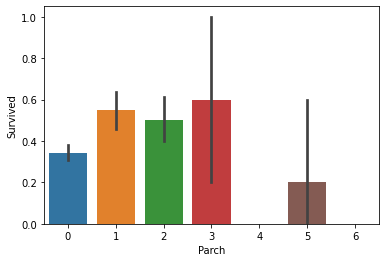

In [106]:
sns.barplot(x="Parch", y="Survived", data=train_df)

print("The percentage of survived people who had 0 parents/children aboard: {} %"
      .format(train_df['Survived'][train_df['Parch'] == 0]
              .value_counts(normalize=True)[1]))
print(train_df['Parch'].value_counts(normalize=True)*100)

* The majority of people who had 0 parents/children aboard constitute this feature.
* 1 and 2 parents/children aboard constitute also significant proportion of dataset.
* The least people(in percentage scale) survived with 0 parents/children aboard.

**Survival by age**

In [ ]:
# fill empty values with -0.5
train['Age'] = train["Age"].fillna(-0.5)
test['Age'] = train["Age"].fillna(-0.5)

# creating interval array
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]

# creating labels
labels = 

## 3. Data cleaning
Drop cabin column since there is significant amount of values missing

In [ ]:
train_df.drop('Cabin', axis='columns', inplace=True)

In [97]:
print("{}".format(format(456.45457, ".2f")))

456.45
